In [22]:
#import important libraries
import pandas as pd
import numpy as np
import sys
import os
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import numpy as np
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from tabulate import tabulate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score


In [23]:
#import  traain dataset
df = pd.read_csv("train.csv", encoding='ISO-8859-1')

df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [25]:
df.shape


(30691, 11)

In [26]:
df.columns


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')

In [27]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [28]:
print(df.columns)
print('*'*50)
for i in df.columns :
    print(i)
    print(df[i].describe())
    print('*'*50)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')
**************************************************
Age of the patient
count    30689.000000
mean        44.107205
std         15.981043
min          4.000000
25%         32.000000
50%         45.000000
75%         55.000000
max         90.000000
Name: Age of the patient, dtype: float64
**************************************************
Gender of the patient
count     29789
unique        2
top        Male
freq      21986
Name: Gender of the patient, dtype: object
**************************************************
Total Bilirubin
count    30043.000000
mean         3.370319
std          6.255522
min          0.400000
25%          0.800000
50%          1.000000
75% 

In [29]:
#finding count of missing values in each column
df.isna().sum()
### cHECKING WHETHER THERE IS STILL ISSING VALUES 
#dropping null values - does not affect data
df = df.dropna()
df.isna().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [30]:

# Assuming 'df' is your DataFrame
df.rename(columns={'Result': 'Liver_disease'}, inplace=True)


In [31]:
#unique values in Liver_disease variable
values_in_Liver_disease = df["Liver_disease"].unique()
print(values_in_Liver_disease)
#recoding Liver_disease variable
df['Liver_disease'] = df['Liver_disease'].replace(2,0)

print(df["Liver_disease"].unique())
#recoding Liver_disease variable
df['Liver_disease'] = df['Liver_disease'].replace(2,0)

print(df["Liver_disease"].unique())

[1 2]
[1 0]
[1 0]


In [32]:
### liver decease
# 1 = 1 Liver Patient, 
# 0 =0 Mon Liver Patient

In [33]:
print('Total persons with liver disease: {} and its percentage is {:.2f}%'.format(df['Liver_disease'].value_counts()[1], (df['Liver_disease'].value_counts()[1] / df['Liver_disease'].value_counts().sum()) * 100))
print ('Total persons without liver disease :  {} and its percentage is {} %'.format(df.Liver_disease.value_counts()[0], round(df.Liver_disease.value_counts()[0]/df.Liver_disease.value_counts().sum()*100,2)) )

Total persons with liver disease: 19478 and its percentage is 71.72%
Total persons without liver disease :  7680 and its percentage is 28.28 %


In [34]:
#identifying if there are duplicates
duplicates = df.duplicated().all()
print(duplicates)

False


In [35]:
#encoding Gender column into categorical data 
LabelEncoder = LabelEncoder()

df['is_male'] = LabelEncoder.fit_transform(df['Gender of the patient'])
df = df.drop(columns='Gender of the patient')
df =  df.rename(columns={'is_male':'Gender of the patient'}, inplace=False)

#new Gender of the patient column where male=1 and female=0


In [36]:
df.columns


# Assuming 'df' is your DataFrame
new_column_names = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
                    'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
                    'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
                    'Liver_disease', 'Gender']

df.columns = new_column_names


In [37]:
df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Liver_disease', 'Gender'],
      dtype='object')

In [38]:

X=df.drop(columns=['Liver_disease'])
y=df['Liver_disease']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [39]:
# Check the dimensionality of X_train
print("Dimensionality of X_train:", X_train.shape)

# Check the dimensionality of y_train
print("Dimensionality of y_train:", y_train.shape)

# Check the dimensionality of X_train
print("Dimensionality of X_test:", X_test.shape)

# Check the dimensionality of y_train
print("Dimensionality of y_test:", y_test.shape)


Dimensionality of X_train: (21726, 10)
Dimensionality of y_train: (21726,)
Dimensionality of X_test: (5432, 10)
Dimensionality of y_test: (5432,)


In [40]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [41]:
df_backup=df
train_backup=train
test_backup=test

Completed for k=2
Completed for k=3
Completed for k=4
Completed for k=5
Completed for k=6
Completed for k=7
Completed for k=8
Completed for k=9
Completed for k=10


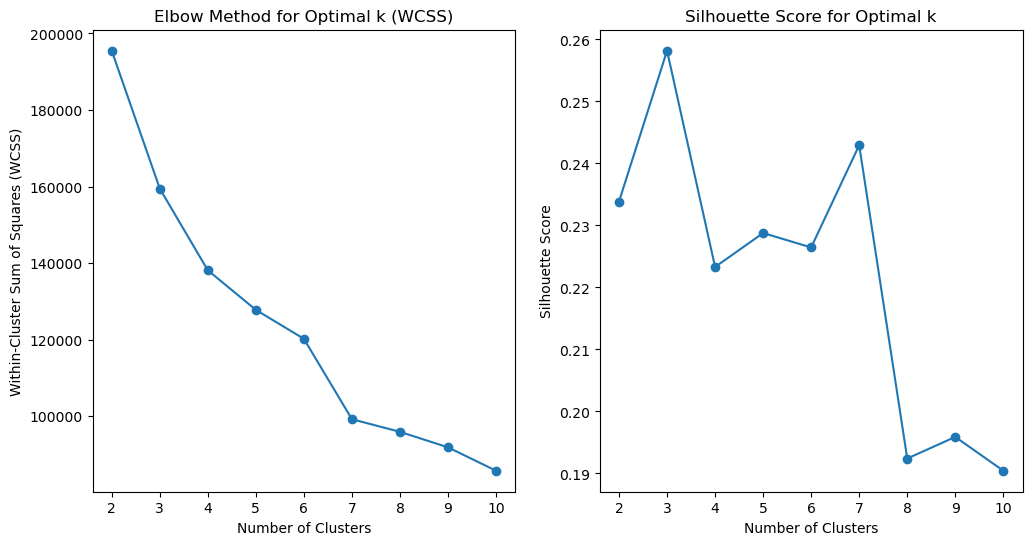

In [46]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable respectively
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

# Identify the indices of categorical features
categorical_indices = [9]  # Assuming the 9th column is your categorical feature

# Create separate transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply transformations to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ~X_train.columns.isin(categorical_indices)),
        ('cat', categorical_transformer, categorical_indices)
    ])

# Fit the preprocessor to the training data
preprocessor.fit(X_train)

# Transform the training data
X_train_processed = preprocessor.transform(X_train)

# Define custom distance metric for KMeans
def custom_distance(X, Y):
    # Extract numerical and categorical parts of the data
    num_cols = X.shape[1] // 2
    X_num = X[:, :num_cols]
    X_cat = X[:, num_cols:]
    Y_num = Y[:, :num_cols]
    Y_cat = Y[:, num_cols:]
    
    # Calculate Euclidean distance for numerical part
    dist_num = np.sqrt(((X_num - Y_num) ** 2).sum(axis=1))
    
    # Calculate Hamming distance for categorical part
    dist_cat = (X_cat != Y_cat).sum(axis=1)
    
    # Combine distances for numerical and categorical parts
    return dist_num + dist_cat

# Initialize empty lists to store evaluation metrics
wcss = []
silhouette_scores = []

# Iterate over a range of cluster numbers
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=28)
    kmeans.fit(X_train_processed)

    # Calculate within-cluster sum of squares (WCSS)
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score
    clusters = kmeans.predict(X_train_processed)
    silhouette_score_val = silhouette_score(X_train_processed, clusters)
    silhouette_scores.append(silhouette_score_val)

    print(f"Completed for k={k}")

# Plot evaluation metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [47]:
from sklearn.cluster import KMeans

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(X_train)

# Get cluster labels for each data point
clusters = kmeans.labels_

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print cluster labels
print("\nCluster Labels:")
print(clusters)

# Count the observations in each cluster
cluster_counts = np.bincount(clusters)

# Print the counts of observations in each cluster
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} observations")


Cluster Centers:
[[4.40218782e+01 3.09073271e+00 1.36853457e+00 2.35537977e+02
  5.08780702e+01 6.89503096e+01 6.51503096e+00 3.17077399e+00
  9.62210010e-01 7.35397317e-01]
 [4.41029412e+01 1.19794118e+01 5.89117647e+00 6.65470588e+02
  1.61397059e+03 3.96666176e+03 6.36911765e+00 2.83676471e+00
  8.88235294e-01 6.32352941e-01]
 [4.39181880e+01 5.00338066e+00 2.47234618e+00 9.69753888e+02
  8.06430020e+01 1.11354293e+02 6.21075051e+00 2.71203516e+00
  7.39912103e-01 7.44421907e-01]
 [4.53554443e+01 8.00675845e+00 3.72528160e+00 3.42602003e+02
  7.09518148e+02 8.49463079e+02 6.01439299e+00 2.77346683e+00
  8.41739675e-01 7.45932416e-01]]

Cluster Labels:
[0 0 0 ... 0 0 0]
Cluster 0: 19380 observations
Cluster 1: 68 observations
Cluster 2: 1479 observations
Cluster 3: 799 observations


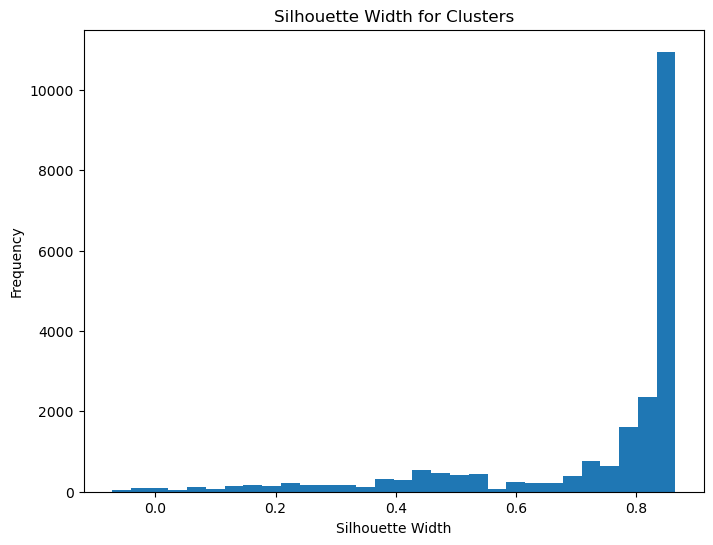

In [48]:
from sklearn.metrics import silhouette_samples

# Assuming clusters contain the cluster labels assigned by KMeans
silhouette_vals = silhouette_samples(X_train, clusters)

# Plot the histogram of silhouette widths for each sample
plt.figure(figsize=(8, 6))
plt.hist(silhouette_vals, bins=30)
plt.title('Silhouette Width for Clusters')
plt.xlabel('Silhouette Width')
plt.ylabel('Frequency')
plt.show()


A silhouette width close to +1 indicates that the sample is well-clustered, with the distance between the sample and the nearest cluster mean.A higher frequency of samples with positive silhouette widths indicates better cluster separation and more reliable clustering results.

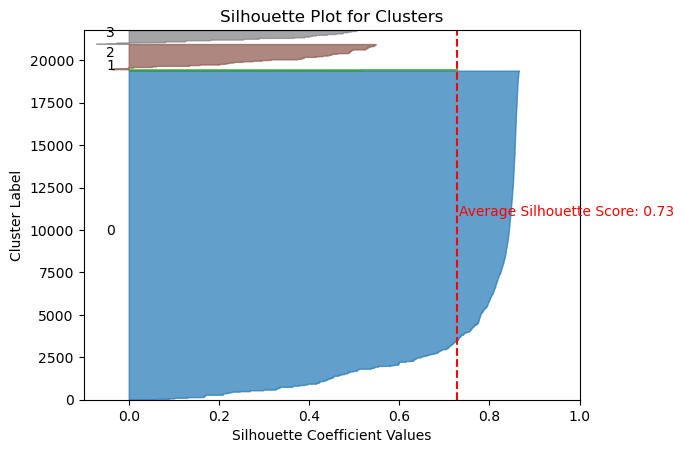

In [50]:
def plot_silhouette(X, clusters):
    silhouette_vals = silhouette_samples(X, clusters)
    n_clusters = len(np.unique(clusters))
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    silhouette_avg = silhouette_score(X, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    ax.text(silhouette_avg + 0.005, 0.5 * len(X), 'Average Silhouette Score: {:.2f}'.format(silhouette_avg), color="red")
    ax.set_title("Silhouette Plot for Clusters")

    plt.show()

# Assuming clusters contain the cluster labels assigned by KMeans
plot_silhouette(X_train, clusters)


In [51]:
from sklearn.metrics import silhouette_score

# Calculate the average silhouette value
silhouette_avg = silhouette_score(X_train, clusters)
print("Average Silhouette Value:", silhouette_avg)


Average Silhouette Value: 0.727341810385514


In [52]:
X_train['cluster_label'] = clusters

In [53]:
# Check categories and counts in the 'cluster_label' column
cluster_label_counts = X_train['cluster_label'].value_counts()

# Print the categories and their counts
print("Cluster Label Categories and Counts:")
print(cluster_label_counts)


Cluster Label Categories and Counts:
cluster_label
0    19380
2     1479
3      799
1       68
Name: count, dtype: int64


In [54]:
# Assign cluster labels to a new column in X_train_new
X_train['cluster_label'] = clusters

# Separate data for each cluster
X_train_cluster_0 = X_train[X_train['cluster_label'] == 0].drop(columns=['cluster_label'])
X_train_cluster_1 = X_train[X_train['cluster_label'] == 1].drop(columns=['cluster_label'])
X_train_cluster_2 = X_train[X_train['cluster_label'] == 2].drop(columns=['cluster_label'])
X_train_cluster_3 = X_train[X_train['cluster_label'] == 3].drop(columns=['cluster_label'])
# Extract target values for each cluster
y_train_cluster_0 = y_train[X_train['cluster_label'] == 0]
y_train_cluster_1 = y_train[X_train['cluster_label'] == 1]
y_train_cluster_2 = y_train[X_train['cluster_label'] == 2]
y_train_cluster_3 = y_train[X_train['cluster_label'] == 3]

In [55]:

# Get the shape of X_train_cluster_0 and y_train_cluster_0
X_train_cluster_0_shape = X_train_cluster_0.shape
y_train_cluster_0_shape = y_train_cluster_0.shape

# Print the shapes
print("Shape of X_train_cluster_0:", X_train_cluster_0_shape)
print("Shape of y_train_cluster_0:", y_train_cluster_0_shape)


Shape of X_train_cluster_0: (19380, 10)
Shape of y_train_cluster_0: (19380,)


In [56]:
# Count the occurrences of each category in y_train_cluster_0
y_train_cluster_0_counts = y_train_cluster_0.value_counts()

# Calculate the proportion of cases where liver disease is present or not present
proportion_have_disease = y_train_cluster_0_counts[1] / len(y_train_cluster_0)
proportion_no_disease = y_train_cluster_0_counts[0] / len(y_train_cluster_0)

# Print the proportions
print("Proportion of cases with liver disease in cluster 0:", proportion_have_disease)
print("Proportion of cases without liver disease in cluster 0:", proportion_no_disease)


Proportion of cases with liver disease in cluster 0: 0.6902992776057791
Proportion of cases without liver disease in cluster 0: 0.30970072239422086


In [57]:

# Get the shape of X_train_cluster_0 and y_train_cluster_0
X_train_cluster_1_shape = X_train_cluster_1.shape
y_train_cluster_1_shape = y_train_cluster_1.shape

# Print the shapes
print("Shape of X_train_cluster_1:", X_train_cluster_1_shape)
print("Shape of y_train_cluster_1:", y_train_cluster_1_shape)


Shape of X_train_cluster_1: (68, 10)
Shape of y_train_cluster_1: (68,)


In [62]:
# Count the occurrences of each category in y_train_cluster_2
y_train_cluster_1_counts = y_train_cluster_1.value_counts()

# Initialize proportions to zero
proportion_have_disease = 0
proportion_no_disease = 0

# Check if the category '1' exists
if 1 in y_train_cluster_1_counts.index:
    proportion_have_disease = y_train_cluster_1_counts[1] / len(y_train_cluster_1)

# Check if the category '0' exists
if 0 in y_train_cluster_1_counts.index:
    proportion_no_disease = y_train_cluster_1_counts[0] / len(y_train_cluster_1)

# Print the proportions
print("Proportion of cases with liver disease in cluster 2:", proportion_have_disease)
print("Proportion of cases without liver disease in cluster 2:", proportion_no_disease)


Proportion of cases with liver disease in cluster 2: 1.0
Proportion of cases without liver disease in cluster 2: 0


In [63]:

# Get the shape of X_train_cluster_0 and y_train_cluster_0
X_train_cluster_2_shape = X_train_cluster_2.shape
y_train_cluster_2_shape = y_train_cluster_2.shape

# Print the shapes
print("Shape of X_train_cluster_2:", X_train_cluster_2_shape)
print("Shape of y_train_cluster_2:", y_train_cluster_2_shape)


Shape of X_train_cluster_2: (1479, 10)
Shape of y_train_cluster_2: (1479,)


In [64]:
# Count the occurrences of each category in y_train_cluster_2
y_train_cluster_2_counts = y_train_cluster_2.value_counts()

# Initialize proportions to zero
proportion_have_disease = 0
proportion_no_disease = 0

# Check if the category '1' exists
if 1 in y_train_cluster_2_counts.index:
    proportion_have_disease = y_train_cluster_2_counts[1] / len(y_train_cluster_2)

# Check if the category '0' exists
if 0 in y_train_cluster_2_counts.index:
    proportion_no_disease = y_train_cluster_2_counts[0] / len(y_train_cluster_2)

# Print the proportions
print("Proportion of cases with liver disease in cluster 2:", proportion_have_disease)
print("Proportion of cases without liver disease in cluster 2:", proportion_no_disease)


Proportion of cases with liver disease in cluster 2: 0.9290060851926978
Proportion of cases without liver disease in cluster 2: 0.07099391480730223


In [65]:

# Get the shape of X_train_cluster_0 and y_train_cluster_0
X_train_cluster_3_shape = X_train_cluster_3.shape
y_train_cluster_3_shape = y_train_cluster_3.shape

# Print the shapes
print("Shape of X_train_cluster_3:", X_train_cluster_3_shape)
print("Shape of y_train_cluster_3:", y_train_cluster_3_shape)


Shape of X_train_cluster_3: (799, 10)
Shape of y_train_cluster_3: (799,)


In [66]:
# Count the occurrences of each category in y_train_cluster_2
y_train_cluster_3_counts = y_train_cluster_3.value_counts()

# Initialize proportions to zero
proportion_have_disease = 0
proportion_no_disease = 0

# Check if the category '1' exists
if 1 in y_train_cluster_3_counts.index:
    proportion_have_disease = y_train_cluster_3_counts[1] / len(y_train_cluster_3)

# Check if the category '0' exists
if 0 in y_train_cluster_3_counts.index:
    proportion_no_disease = y_train_cluster_3_counts[0] / len(y_train_cluster_3)

# Print the proportions
print("Proportion of cases with liver disease in cluster 3:", proportion_have_disease)
print("Proportion of cases without liver disease in cluster 3:", proportion_no_disease)


Proportion of cases with liver disease in cluster 3: 1.0
Proportion of cases without liver disease in cluster 3: 0
